# Primary data analysis

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
df_train      = pd.read_csv('./data/training.csv')
df_test       = pd.read_csv('./data/test.csv')
df_submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
df_train.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [4]:
df_test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [5]:
# a tuple representing the dimensionality of the TRAIN and TEST DataFrames
print(df_train.shape, df_test.shape)

(95662, 16) (45019, 15)


- **TransactionId** --- Unique пњљtransaction identifier on platform
- **BatchId** --- Unique number assigned to a batch of transactions for processing
- **AccountId** --- Unique number identifying the customer on platform
- **SubscriptionId** --- Unique number identifying the customer subscription
- **CustomerId** --- Unique identifier attached to Account
- **CurrencyCode** --- Country currency
- **CountryCode** --- Numerical geographical code of country
- **ProviderId** --- Source provider of Item bought
- **ProductId** --- Item name being bought
- **ProductCategory** --- ProductIds are organized into these broader product categories
- **ChannelId** --- Identifies if customer used web, Android, IOS, pay later or checkout
- **Amount** --- Value of the transaction. Positive for debits from customer account and negative for credit into customer account
- **Value** --- Absolute value of the amount
- **TransactionStartTime** --- Transaction start time
- **PricingStrategy** --- Category of Xente's pricing structure for merchants
- **FraudResult** --- Fraud status of transaction 1 -yes or 0-No

In [6]:
# Indicator whether DataFrame is empty
print(df_train.empty, df_test.empty)

False False


In [7]:
print(df_train.isnull().sum().max(), df_test.isnull().sum().max())

0 0


In [8]:
df_train.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [9]:
print('=== Number of unique values in columns (TRAIN) ===')
for clm in df_train.columns:
    print(clm, ':', df_train[clm].nunique())

=== Number of unique values in columns (TRAIN) ===
TransactionId : 95662
BatchId : 94809
AccountId : 3633
SubscriptionId : 3627
CustomerId : 3742
CurrencyCode : 1
CountryCode : 1
ProviderId : 6
ProductId : 23
ProductCategory : 9
ChannelId : 4
Amount : 1676
Value : 1517
TransactionStartTime : 94556
PricingStrategy : 4
FraudResult : 2


In [10]:
print('=== Number of unique values in columns (TEST) ===')
for clm in df_test.columns:
    print(clm, ':', df_test[clm].nunique())

=== Number of unique values in columns (TEST) ===
TransactionId : 45019
BatchId : 44684
AccountId : 2471
SubscriptionId : 2470
CustomerId : 5018
CurrencyCode : 1
CountryCode : 1
ProviderId : 6
ProductId : 26
ProductCategory : 9
ChannelId : 5
Amount : 998
Value : 944
TransactionStartTime : 44018
PricingStrategy : 4


### Field `TransactionId`

Содержит уникальные знаения, использование затруднительно

In [11]:
# проверяем пересекаются ли тразакции в train и test
len(set(df_train['TransactionId']) & set(df_test['TransactionId']))

0

можно удалять

### Field `BatchId`

Проанализировать возможность использования `BatchId`

### Field `AccountId`

In [12]:
# проверяем пересекаются ли аккаунты в train и test
len(set(df_train['AccountId']) & set(df_test['AccountId']))

1263

для предикта можно воспользоваться информацией о тех аккаунтуах, которые есть на трейне

### Fields `SubscriptionId`, `CustomerId`

Проанализировать возможность использования

Проверить не связаны ли frauds с использованием нового SubscriptionId или нового CustomerId

### Fields `CurrencyCode`,  `CountryCode`, `ProviderId`, `ProductId`, `ProductCategory`, `ChannelId`, `PricingStrategy`

In [13]:
columns = ['CurrencyCode', 
           'CountryCode', 
           'ProviderId', 
           'ProductId', 
           'ProductCategory', 
           'ChannelId', 
           'PricingStrategy']
for clm in columns:
    print('--- ', clm, ' ---')
    print('Train:', np.sort(df_train[clm].unique()))
    print('Test: ', np.sort( df_test[clm].unique()))
    print()

---  CurrencyCode  ---
Train: ['UGX']
Test:  ['UGX']

---  CountryCode  ---
Train: [256]
Test:  [256]

---  ProviderId  ---
Train: ['ProviderId_1' 'ProviderId_2' 'ProviderId_3' 'ProviderId_4'
 'ProviderId_5' 'ProviderId_6']
Test:  ['ProviderId_1' 'ProviderId_2' 'ProviderId_3' 'ProviderId_4'
 'ProviderId_5' 'ProviderId_6']

---  ProductId  ---
Train: ['ProductId_1' 'ProductId_10' 'ProductId_11' 'ProductId_12' 'ProductId_13'
 'ProductId_14' 'ProductId_15' 'ProductId_16' 'ProductId_19' 'ProductId_2'
 'ProductId_20' 'ProductId_21' 'ProductId_22' 'ProductId_23'
 'ProductId_24' 'ProductId_27' 'ProductId_3' 'ProductId_4' 'ProductId_5'
 'ProductId_6' 'ProductId_7' 'ProductId_8' 'ProductId_9']
Test:  ['ProductId_1' 'ProductId_10' 'ProductId_11' 'ProductId_13' 'ProductId_14'
 'ProductId_15' 'ProductId_16' 'ProductId_17' 'ProductId_18'
 'ProductId_19' 'ProductId_2' 'ProductId_20' 'ProductId_21' 'ProductId_22'
 'ProductId_23' 'ProductId_24' 'ProductId_25' 'ProductId_26'
 'ProductId_27' 'ProductId_

Выводы:
- `CurrencyCode` на `train` и `test` принимает **одно** значение
- `CountryCode` на `train` и `test` принимает **одно** значение
- `ProviderId` принимает 6 значений, которые совпадают на `train` и `test`
- `ProductId` принимает **27** возможных значений!
- `ProductCategory` принимает **9** несовпадающих значений! `other` в `train` заменено на `retail` в `test`
- `ChannelId` на `train` **не содержит** `ChannelId_4`
- `PricingStrategy` принимает 4 значения, которые совпадают на `train` и `test`, но значение `3` отсутствует

### Field `CurrencyCode`

Вывод: удалить

### Field `CountryCode`

Вывод: удалить

### Field `ProviderId`

In [14]:
field_name = 'ProviderId'
nunique_trn = df_train[field_name].nunique()
nunique_tst = df_test [field_name].nunique()
ids = []                    #list IDs
trn = np.zeros(nunique_trn) #list train
tst = np.zeros(nunique_tst) #list test
print(field_name + '   : train : test')
for i in range(max(nunique_trn, nunique_tst)):
    ID = field_name + '_' + str(i+1)
    n_train = df_train[field_name][df_train[field_name] == ID].count()
    n_test  = df_test [field_name][df_test [field_name] == ID].count()
    ids.append(ID)
    trn[i] = n_train
    tst[i] = n_test
    print(ids[i], ':', n_train, ':', n_test)

ProviderId   : train : test
ProviderId_1 : 5643 : 2391
ProviderId_2 : 18 : 6
ProviderId_3 : 3084 : 1568
ProviderId_4 : 38189 : 18256
ProviderId_5 : 14542 : 6977
ProviderId_6 : 34186 : 15821


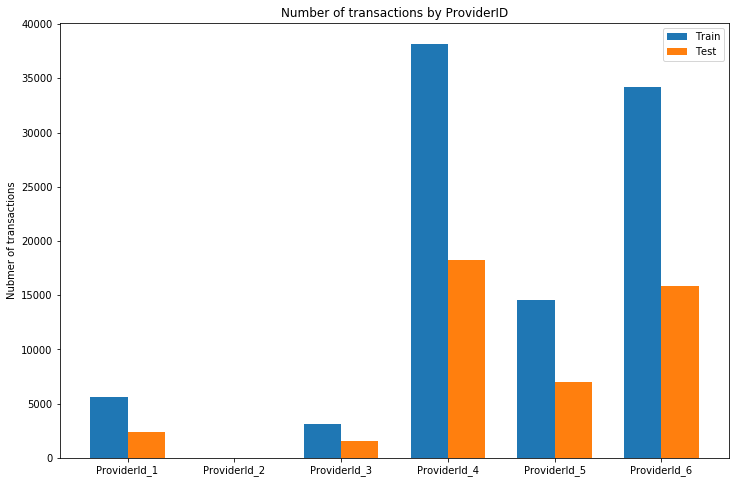

In [15]:
ind = np.arange(nunique_trn)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(ind - width/2, trn, width, label='Train')
rects2 = ax.bar(ind + width/2, tst, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nubmer of transactions')
ax.set_title('Number of transactions by ProviderID')
ax.set_xticks(ind)
ax.set_xticklabels(ids)
ax.legend()

plt.show()

Вывод: применить `One-Hot Encoding`

### Field `ProductId`

In [16]:
field_name = 'ProductId'
n_union_uniqui = 27
ids = []                       #list IDs
trn = np.zeros(n_union_uniqui) #list train
tst = np.zeros(n_union_uniqui) #list test
print(field_name + '   : train : test')
for i in range(n_union_uniqui):
    ID = field_name + '_' + str(i+1)
    n_train = df_train[field_name][df_train[field_name] == ID].count()
    n_test  = df_test [field_name][df_test [field_name] == ID].count()
    ids.append(ID)
    trn[i] = n_train
    tst[i] = n_test
    print(ids[i], ':', n_train, ':', n_test)

ProductId   : train : test
ProductId_1 : 2885 : 1212
ProductId_2 : 236 : 41
ProductId_3 : 24344 : 10310
ProductId_4 : 2403 : 875
ProductId_5 : 25 : 5
ProductId_6 : 32635 : 15186
ProductId_7 : 86 : 42
ProductId_8 : 197 : 74
ProductId_9 : 17 : 3
ProductId_10 : 15384 : 8482
ProductId_11 : 1377 : 867
ProductId_12 : 2 : 0
ProductId_13 : 296 : 105
ProductId_14 : 789 : 473
ProductId_15 : 11964 : 6007
ProductId_16 : 10 : 35
ProductId_17 : 0 : 6
ProductId_18 : 0 : 7
ProductId_19 : 965 : 334
ProductId_20 : 216 : 16
ProductId_21 : 1512 : 566
ProductId_22 : 112 : 69
ProductId_23 : 1 : 2
ProductId_24 : 175 : 78
ProductId_25 : 0 : 31
ProductId_26 : 0 : 184
ProductId_27 : 31 : 9


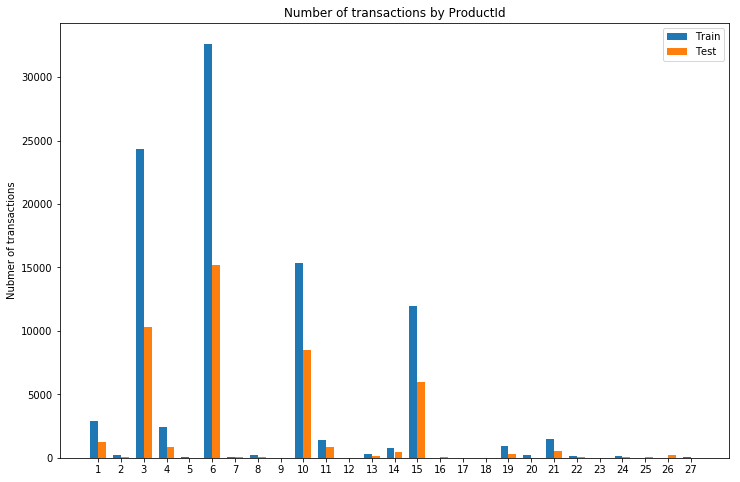

In [17]:
ind = np.arange(n_union_uniqui)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(ind - width/2, trn, width, label='Train')
rects2 = ax.bar(ind + width/2, tst, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nubmer of transactions')
ax.set_title('Number of transactions by ' + field_name)
ax.set_xticks(ind)
ax.set_xticklabels(range(1, n_union_uniqui+1))
ax.legend()

plt.show()

Вывод: применить `One-Hot Encoding` для **27** значений от `ProductId_1` до `ProductId_27`

### Field `ProductCategory`

In [18]:
field_name = 'ProductCategory'
PC_list = np.sort(list(set(df_train[field_name].unique()) | set(df_test[field_name].unique())))
n_union_uniqui = len(PC_list)
ids = []                       #list IDs
trn = np.zeros(n_union_uniqui) #list train
tst = np.zeros(n_union_uniqui) #list test
print(field_name + '   : train : test')
for i, ID in enumerate(PC_list):
    n_train = df_train[field_name][df_train[field_name] == ID].count()
    n_test  = df_test [field_name][df_test [field_name] == ID].count()
    ids.append(ID)
    trn[i] = n_train
    tst[i] = n_test
    print(ids[i], ':', n_train, ':', n_test)

ProductCategory   : train : test
airtime : 45027 : 20923
data_bundles : 1613 : 914
financial_services : 45405 : 21700
movies : 175 : 78
other : 2 : 0
retail : 0 : 184
ticket : 216 : 16
transport : 25 : 5
tv : 1279 : 459
utility_bill : 1920 : 740


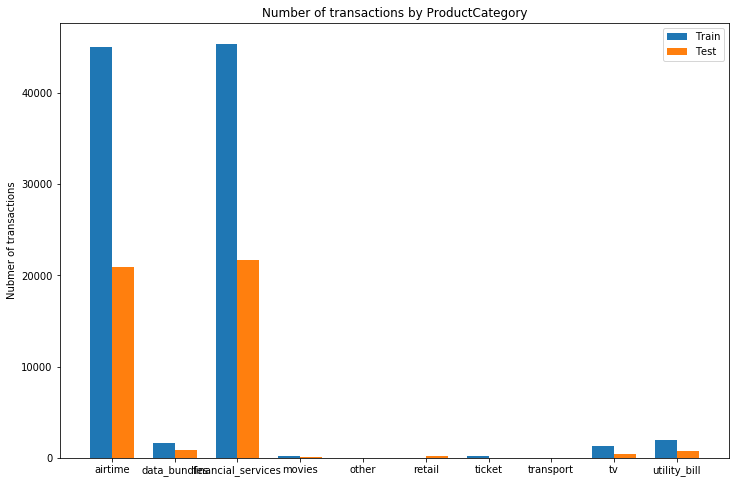

In [19]:
ind = np.arange(n_union_uniqui)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(ind - width/2, trn, width, label='Train')
rects2 = ax.bar(ind + width/2, tst, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nubmer of transactions')
ax.set_title('Number of transactions by ' + field_name)
ax.set_xticks(ind)
ax.set_xticklabels(ids)
ax.legend()

plt.show()

Вывод: перекодировать общий список `ProductCategory` в последовательность `[0,1,2,...,9]`, применить One-Hot Encoding для этих значений

### Field `ChannelId`

In [20]:
field_name = 'ChannelId'
n_union_uniqui = 5
ids = []                       #list IDs
trn = np.zeros(n_union_uniqui) #list train
tst = np.zeros(n_union_uniqui) #list test
print(field_name + '   : train : test')
for i in range(n_union_uniqui):
    ID = field_name + '_' + str(i+1)
    n_train = df_train[field_name][df_train[field_name] == ID].count()
    n_test  = df_test [field_name][df_test [field_name] == ID].count()
    ids.append(ID)
    trn[i] = n_train
    tst[i] = n_test
    print(ids[i], ':', n_train, ':', n_test)

ChannelId   : train : test
ChannelId_1 : 538 : 102
ChannelId_2 : 37141 : 6198
ChannelId_3 : 56935 : 38090
ChannelId_4 : 0 : 27
ChannelId_5 : 1048 : 602


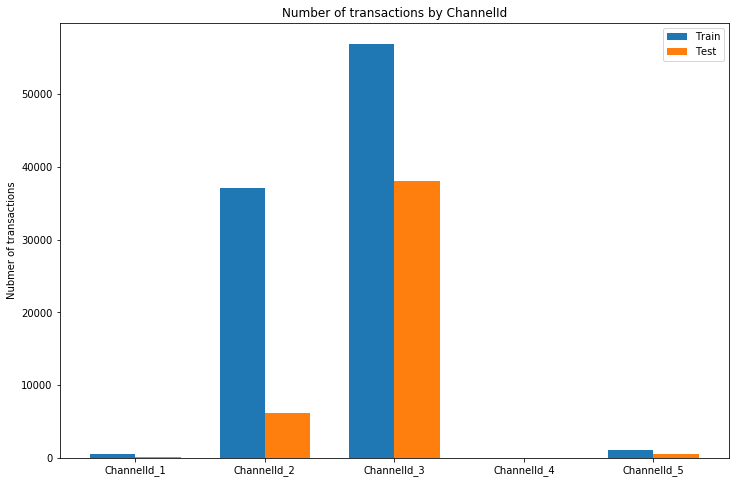

In [21]:
ind = np.arange(n_union_uniqui)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(ind - width/2, trn, width, label='Train')
rects2 = ax.bar(ind + width/2, tst, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nubmer of transactions')
ax.set_title('Number of transactions by ' + field_name)
ax.set_xticks(ind)
ax.set_xticklabels(ids)
ax.legend()

plt.show()

Вывод: применить `One-Hot Encoding` для **5** значений от `ChannelId_1` до `ChannelId_5`

### Field `PricingStrategy`

In [22]:
field_name = 'PricingStrategy'
n_union_uniqui = 5
ids = []                       #list IDs
trn = np.zeros(n_union_uniqui) #list train
tst = np.zeros(n_union_uniqui) #list test
print(field_name + '   : train : test')
for i in range(n_union_uniqui):
    ID = i                     # changed
    n_train = df_train[field_name][df_train[field_name] == ID].count()
    n_test  = df_test [field_name][df_test [field_name] == ID].count()
    ids.append(ID)
    trn[i] = n_train
    tst[i] = n_test
    print(ids[i], ':', n_train, ':', n_test)

PricingStrategy   : train : test
0 : 385 : 268
1 : 1867 : 692
2 : 79848 : 37578
3 : 0 : 0
4 : 13562 : 6481


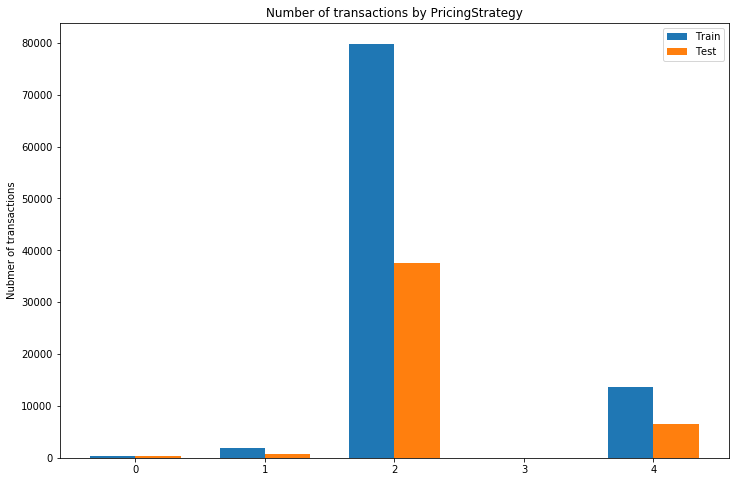

In [23]:
ind = np.arange(n_union_uniqui)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(ind - width/2, trn, width, label='Train')
rects2 = ax.bar(ind + width/2, tst, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nubmer of transactions')
ax.set_title('Number of transactions by ' + field_name)
ax.set_xticks(ind)
ax.set_xticklabels(ids)  # changed
ax.legend()

plt.show()

Вывод: перекодировать `4` на `3`

## Field `FraudResult`

# Исследовать сколько frauds приходится на каждое значение каждого из полей

In [ ]:
df_train[df_train['FraudResult'] == 1][df_train['ProductId'] == 'ProductId_1'].count()

In [ ]:
df_train.filter(items=['TransactionId', 'ProductId']).groupby(['ProductId']).count()

In [ ]:
#df_train.filter(items=['TransactionId', 'ProductId', 'FraudResult']).groupby(['FraudResult']).count()

In [ ]:
plt.hist(df_test['ProductId']);

In [ ]:
num_nofraud = df_train['FraudResult'].value_counts()[0]
num_fraud   = df_train['FraudResult'].value_counts()[1]

print('No Frauds:', num_nofraud, 'transactions,', round(num_nofraud / len(df_train), 3), '% of the dataset')
print('Frauds:', num_fraud, 'transactions,', round(num_fraud / len(df_train), 3), '% of the dataset')

In [ ]:
df_fraud_Am_Val = df_train.sort_values(by=['FraudResult'], ascending=False).filter(items=['Amount', 'Value']).head(num_fraud)

In [ ]:
df_fraud_Am_Val.groupby(['Amount']).count()

In [ ]:
df_fraud_Am_Val.Amount.value_counts()

In [ ]:
plt.hist(df_fraud_Am_Val['Amount'], bins=50);

In [ ]:
plt.hist(df_train['Amount'], bins=50);

In [ ]:
df_train.describe()

# Data Preprocessing

1. Удаляем безполезные столбцы
- Переводим текстовое поля дата-время в корректный формат
- Переводим текстовые поля в числовые
- Кодируем числовые поля с помощью `LabelEncoder`
- Кодируем числовые поля с помощью `OneHotEncoder`

**1. Удаляем столбцы, не содержащие полезную информацию**

In [24]:
df_trn = df_train.drop(columns=['TransactionId', 'CurrencyCode', 'CountryCode'])
df_tst =  df_test.drop(columns=['TransactionId', 'CurrencyCode', 'CountryCode'])

**2. Преобразуем поле `TransactionStartTime` типа object в тип `datetime64`**

In [25]:
df_trn['TransactionStartTime'] = pd.to_datetime(df_trn['TransactionStartTime'])
df_tst['TransactionStartTime'] = pd.to_datetime(df_tst['TransactionStartTime'])

In [26]:
df_trn['TransactionStartTime'].head()

0   2018-11-15 02:18:49
1   2018-11-15 02:19:08
2   2018-11-15 02:44:21
3   2018-11-15 03:32:55
4   2018-11-15 03:34:21
Name: TransactionStartTime, dtype: datetime64[ns]

**3. Преобразовываем текстовые ID в числовые. Для этого сначала отрезаем преффикс у текстовых ID. Далее преобразуем строки, содержащие цифры в числа**

In [27]:
columns_with_ID = ['BatchId', 
                   'AccountId', 
                   'SubscriptionId', 
                   'CustomerId', 
                   'ProviderId', 
                   'ProductId', 
                   'ChannelId'] 

In [28]:
df_trn[columns_with_ID].head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
0,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,ChannelId_3
1,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,ChannelId_2
2,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,ChannelId_3
3,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,ChannelId_3
4,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,ChannelId_2


In [29]:
print('=== Type of columns ===')
for clm in columns_with_ID:
    print(clm, ':', df_trn[clm].dtype)

=== Type of columns ===
BatchId : object
AccountId : object
SubscriptionId : object
CustomerId : object
ProviderId : object
ProductId : object
ChannelId : object


In [30]:
# удаляем префикс
for col_name in columns_with_ID:
    df_trn[col_name] = df_trn[col_name].apply(lambda s: s[len(col_name)+1:])
for col_name in columns_with_ID:
    df_tst[col_name] = df_tst[col_name].apply(lambda s: s[len(col_name)+1:])

In [31]:
# преобразуем цифровую строку в число
df_trn[columns_with_ID] = df_trn[columns_with_ID].apply(pd.to_numeric)
df_tst[columns_with_ID] = df_tst[columns_with_ID].apply(pd.to_numeric)

In [32]:
df_trn[columns_with_ID].head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
0,36123,3957,887,4406,6,10,3
1,15642,4841,3829,4406,4,6,2
2,53941,4229,222,4683,6,1,3
3,102363,648,2185,988,1,21,3
4,38780,4841,3829,988,4,6,2


In [33]:
print('=== Type of columns ===')
for clm in columns_with_ID:
    print(clm, ':', df_trn[clm].dtype)

=== Type of columns ===
BatchId : int64
AccountId : int64
SubscriptionId : int64
CustomerId : int64
ProviderId : int64
ProductId : int64
ChannelId : int64


In [34]:
df_trn.to_csv('./data/training_num.csv', encoding='utf-8', index=False)
df_tst.to_csv('./data/test_num.csv',     encoding='utf-8', index=False)

**4. С помощью `LabelEncoder` кодируем поля:** 
- `BatchId`
- `AccountId`
- `SubscriptionId`
- `CustomerId`
- `ProviderId`
- `ProductId`
- `ProductCategory`
- `ChannelId`
- `PricingStrategy`

In [35]:
# проверяем как пересекаются BatchID в train и test
clm = 'BatchId'
print('Train:', min(df_trn[clm]), max(df_trn[clm]), df_trn[clm].nunique())
print('Train:', min(df_tst[clm]), max(df_tst[clm]), df_tst[clm].nunique())
print('Intersection:', len(set(df_trn[clm]) & set(df_tst[clm])))

Train: 2 139493 94809
Train: 1 139492 44684
Intersection: 0


In [36]:
# проверяем как пересекаются AccountId в train и test
clm = 'AccountId'
print('Train:', min(df_trn[clm]), max(df_trn[clm]), df_trn[clm].nunique())
print('Train:', min(df_tst[clm]), max(df_tst[clm]), df_tst[clm].nunique())
print('Intersection:', len(set(df_trn[clm]) & set(df_tst[clm])))

Train: 1 4841 3633
Train: 10 4841 2471
Intersection: 1263


In [37]:
# проверяем как пересекаются SubscriptionId в train и test
clm = 'SubscriptionId'
print('Train:', min(df_trn[clm]), max(df_trn[clm]), df_trn[clm].nunique())
print('Train:', min(df_tst[clm]), max(df_tst[clm]), df_tst[clm].nunique())
print('Intersection:', len(set(df_trn[clm]) & set(df_tst[clm])))

Train: 2 4836 3627
Train: 1 4836 2470
Intersection: 1261


In [38]:
# проверяем как пересекаются CustomerId в train и test
clm = 'CustomerId'
print('Train:', min(df_trn[clm]), max(df_trn[clm]), df_trn[clm].nunique())
print('Train:', min(df_tst[clm]), max(df_tst[clm]), df_tst[clm].nunique())
print('Intersection:', len(set(df_trn[clm]) & set(df_tst[clm])))

Train: 1 7479 3742
Train: 16 7449 5018
Intersection: 1281


Все поля будем кодировать по-своему, в ручную!

`Label Encoding` своими руками

In [39]:
# dct = {'Kiev': 0, 'London': 1, 'Minsk': 2}
# data['city_le'] = data['city'].map(dct)

In [40]:
# список полей для LE-кодирования путем уменьшения значения на 1
columns4le = ['BatchId', 
              'AccountId',
              'SubscriptionId',
              'CustomerId',
              'ProviderId',
              'ProductId',
              #'ProductCategory',
              'ChannelId',
              #'PricingStrategy'
             ]

In [41]:
for clm in columns4le:
    df_trn[clm] = df_trn[clm].apply(lambda x: x-1)
    df_tst[clm] = df_tst[clm].apply(lambda x: x-1)
    
    df_trn[clm] = df_trn[clm].astype(int)
    df_tst[clm] = df_tst[clm].astype(int)

**`Label Encoding` column `ProductCategory`**

In [42]:
np.sort(list(set(df_train['ProductCategory'].unique()) | set(df_test['ProductCategory'].unique())))

array(['airtime', 'data_bundles', 'financial_services', 'movies', 'other',
       'retail', 'ticket', 'transport', 'tv', 'utility_bill'],
      dtype='<U18')

In [43]:
dic = {'airtime': 0, 
       'data_bundles': 1, 
       'financial_services': 2, 
       'movies': 3, 
       'other': 4,
       'retail': 5, 
       'ticket': 6, 
       'transport': 7, 
       'tv': 8, 
       'utility_bill': 9}

In [44]:
df_trn['ProductCategory'] = df_trn['ProductCategory'].map(dic)
df_tst['ProductCategory'] = df_tst['ProductCategory'].map(dic)

In [45]:
df_trn['PricingStrategy'] = df_trn['PricingStrategy'].apply(lambda x: x-1 if x==4 else x)
df_tst['PricingStrategy'] = df_tst['PricingStrategy'].apply(lambda x: x-1 if x==4 else x)

df_trn['PricingStrategy'] = df_trn['PricingStrategy'].astype(int)
df_tst['PricingStrategy'] = df_tst['PricingStrategy'].astype(int)

In [46]:
# from sklearn.preprocessing import LabelEncoder

In [47]:
# список полей для LE-кодирования
# columns4le = ['BatchId', 
#               'AccountId',
#               'SubscriptionId',
#               'CustomerId',
#               'ProviderId',
#               'ProductId',
#               'ProductCategory',
#               'ChannelId',
#               'PricingStrategy']

In [48]:
# columns4le.remove('ProviderId')
# columns4le.remove('ProductId')
# columns4le.remove('ProductCategory')
# columns4le.remove('ChannelId')
# columns4le.remove('PricingStrategy')

In [49]:
# df[columns4le].head()

In [50]:
# print('FieldName : min max number-of-unique-elements')
# for clm in columns4le:
#     print(clm, ':', min(df[clm]), max(df[clm]), df[clm].nunique())

In [51]:
# for clm in columns4le:
#     le = LabelEncoder()
#     df[clm] = le.fit(df[clm]).transform(df[clm])

In [52]:
# df[columns4le].head()

In [53]:
# print('FieldName : min max number-of-unique-elements')
# for clm in columns4le:
#     print(clm, ':', min(df[clm]), max(df[clm]), df[clm].nunique())

**Results**

In [54]:
df_trn.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,36122,3956,886,4405,5,9,0,2,1000.0,1000,2018-11-15 02:18:49,2,0
1,15641,4840,3828,4405,3,5,2,1,-20.0,20,2018-11-15 02:19:08,2,0
2,53940,4228,221,4682,5,0,0,2,500.0,500,2018-11-15 02:44:21,2,0
3,102362,647,2184,987,0,20,9,2,20000.0,21800,2018-11-15 03:32:55,2,0
4,38779,4840,3828,987,3,5,2,1,-644.0,644,2018-11-15 03:34:21,2,0


In [55]:
df_trn.dtypes

BatchId                          int64
AccountId                        int64
SubscriptionId                   int64
CustomerId                       int64
ProviderId                       int64
ProductId                        int64
ProductCategory                  int64
ChannelId                        int64
Amount                         float64
Value                            int64
TransactionStartTime    datetime64[ns]
PricingStrategy                  int64
FraudResult                      int64
dtype: object

In [56]:
df_trn.to_csv('./data/training_le.csv', encoding='utf-8', index=False)
df_tst.to_csv('./data/test_le.csv',     encoding='utf-8', index=False)

**5. С помощью `OneHotEncoder` кодируем признаки** 
- `BatchId`
- `AccountId`
- `SubscriptionId`
- `CustomerId`
- `ProviderId`, 
- `ProductId`,
- `ProductCategory`,
- `ChannelId`,
- `PricingStrategy`

In [ ]:
def manual_ohe(data, feature, n_unique):
    for i in range(n_unique):
        data[feature + '_' + str(i)] = (data[feature] == i).astype(int)

In [ ]:
df_trn.head()

In [ ]:
columns4ohe_short = [
#     'BatchId', 
#     'AccountId', 
#     'SubscriptionId', 
#     'CustomerId', 
    'ProviderId',
    'ProductId', 
    'ProductCategory', 
    'ChannelId', 
    'PricingStrategy'
]

In [ ]:
print('FieldName : min max number-of-unique-elements')
for clm in columns4ohe_short:
    print(clm, '(train):', min(df_trn[clm]), max(df_trn[clm]), df_trn[clm].nunique())
    print(clm, '(test) :', min(df_tst[clm]), max(df_tst[clm]), df_tst[clm].nunique())

In [ ]:
for clm in columns4ohe_short:
    manual_ohe(df_trn, clm, max(max(df_trn[clm]), max(df_tst[clm]))+1)
    manual_ohe(df_tst, clm, max(max(df_trn[clm]), max(df_tst[clm]))+1)

In [ ]:
df_trn = df_trn.drop(columns=columns4ohe_short)
df_tst = df_tst.drop(columns=columns4ohe_short)

In [ ]:
df_trn.head()

In [ ]:
df_trn.to_csv('./data/training_ohe_short.csv', encoding='utf-8', index=False)
df_tst.to_csv('./data/test_ohe_short.csv',     encoding='utf-8', index=False)

In [ ]:
# from sklearn import preprocessing
# cat_features = ['color', 'director_name', 'actor_2_name']
# enc = preprocessing.LabelEncoder()
# enc.fit(cat_features)
# new_cat_features = enc.transform(cat_features)
# print(new_cat_features) # [1 2 0]
# new_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape
# ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
# print(ohe.fit_transform(new_cat_features))

## Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
df_trn_cut = pd.DataFrame(df_trn, columns = ['Amount', 'Value', 
                                             'PricingStrategy_0', 'PricingStrategy_1', 
                                             'PricingStrategy_2', 'PricingStrategy_3'])
df_tst_cut = pd.DataFrame(df_tst, columns = ['Amount', 'Value', 
                                             'PricingStrategy_0', 'PricingStrategy_1', 
                                             'PricingStrategy_2', 'PricingStrategy_3'])

In [ ]:
df_trn_cut.head()

In [ ]:
def scaleColumns(data, cols_to_scale, scaler):
    for col in cols_to_scale:
        data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[col])))
    return data

In [58]:
def scaleColumns(data, cols_to_scale, scaler):
    for col in cols_to_scale:
        data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df['Value'])))
    return data

In [ ]:
df_trn_cut = scaleColumns(df_trn_cut, ['Amount','Value'])
df_tst_cut = scaleColumns(df_tst_cut, ['Amount','Value'])

In [ ]:
df_trn_cut.head()

In [ ]:
columnsPS = ['PricingStrategy_0', 'PricingStrategy_1', 'PricingStrategy_2', 'PricingStrategy_3']
df_trn_cut = df_trn_cut.drop(columns=columnsPS)
df_tst_cut = df_tst_cut.drop(columns=columnsPS)

In [ ]:
df_trn_cut.head()

In [ ]:
# конъюнкция двух признаков
def make_conj(data, feature1, feature2):
    data[feature1 + '+' + feature2] = data[feature1].astype(str) + '+' + data[feature1].astype(str)
    return data

# Создаем новые признаки

In [ ]:
# пример использования
make_conj(data, 'city', 'degree dvid d')

**compare f1_score**

In [ ]:
y1      = [0, 0, 0, 1, 0]
y1_pred = [0, 0, 1, 1, 0]
f1_score(y1, y1_pred)

In [ ]:
y2      = [1, 1,  1, -1, 1]
y2_pred = [1, 1, -1, -1, 1]
f1_score(y2, y2_pred)

# 1. Rule based approach
перебирая пороговое значение для поля 'Amount' ищем наиболее высокое значение F1 на обучающем наборе

In [ ]:
def F1_score:
    TP = # True Positive
    FP = # False Positive
    FN = # False Negative
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)
    return 2*precision*recall / (precision + recall)    

In [ ]:
F1_max = 0
len_df = len(df)
threshold = range(round(min(df['Amount'])), round(max(df['Amount'])), 100)
for ts in threshold:
    df_ts = df[df['Amount'] > thr]
    num_fraud_ts = df_ts['FraudResult'].value_counts()[1]

In [ ]:
ts = 300000
y_hat = df['Amount'] > ts
data = np.array(y_hat)
FraudResult_hat = pd.Series(df['Amount'] > ts)

In [ ]:
FraudResult_hat.astype('int64')

In [ ]:

f1_ts = f1_score(df['FraudResult'], FraudResult_hat)
f1_ts

In [ ]:
from tqdm import tqdm

In [ ]:
f1_scores = []
thresholds = range(0, round(max(df['Amount'])), 100)
for ts in thresholds:
    FraudPredict = pd.Series(df['Amount'] > ts)
    f1 = f1_score(df['FraudResult'], FraudPredict)
    f1_scores.append(f1)

In [ ]:
print('Best threshold of Amount', thresholds[f1_scores.index(max(f1_scores))])
print('F1 for best threshold Amount:', max(f1_scores))

In [ ]:
plt.figure(figsize=(12,8))
marker_size = [4]*len(thresholds)
plt.title('Search best threshould of Amount', fontsize=14)
plt.scatter(thresholds, f1_scores, s=marker_size)
plt.xlabel('Threshold of Amount', fontsize=12)
plt.ylabel('F1 score', fontsize=12)
plt.show

# 2. Supervised Approaches 

- Logistic Regression (LR)
- k-Nearest Neighbors (kNN)
- Support Vector Machines (SVM)
- Decision Tree (DT)
- Random Forest (RF)
- Extreme Gradient Boosting (XGB)

Делаем *Under-Sampling* и *Over-Sampling* и решаем как задачу бинарной классификации с помощью LR, kNN, SVM, DT, RF, XGB

## Under-Sampling

## Over-Sampling

# 3. Anomaly Detection Algorithms (Unsupervised Approaches)
Рассматриваем задачу Fraud Detection как задачу Anomaly Detection

Algorithms:
- One-Class SVM
- Isolation Forest
- Fitting an elliptic envelope
- Local Outlier Factor (LOF)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('./data/training.csv')

In [ ]:
df_train.columns

In [ ]:
list(df_train['FraudResult'])[130:140]

In [ ]:
#df = pd.DataFrame({'PricingStrategy': df_train['PricingStrategy'],
#                   'Value': df_train['Value']})

In [ ]:
removable_columns = ['TransactionId', 
                     'BatchId', 
                     'AccountId', 
                     'SubscriptionId', 
                     'CustomerId', 
                     'CurrencyCode',
                     'CountryCode',
                     'ProviderId', 
                     'ProductId', 
                     'ProductCategory', 
                     'ChannelId', 
                     #'Amount', 
                     #'Value', 
                     'TransactionStartTime', 
                     #'PricingStrategy',
                     'FraudResult'
                    ]
df = df_train.drop(columns=removable_columns)

In [ ]:
df.head()

Попробовать разные скейлеры
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [ ]:
type(df)

In [ ]:
df[:5,]

In [ ]:
num_transactions = df_train.shape[0]
num_otliers = df_train['FraudResult'].value_counts()[1]
num_inliers = df_train['FraudResult'].value_counts()[0]
outliers_fraction = num_otliers / num_transactions
print('outliers fraction:', round(outliers_fraction, 3))

In [ ]:
df.head()

In [ ]:
df = df.drop(columns=['BatchId', 
                      'AccountId', 
                      'SubscriptionId', 
                      'CustomerId', 
                      'TransactionStartTime', 
                      'FraudResult'])

In [ ]:
df.head()

## One-Class SVM (OCSVM)

In [ ]:
from sklearn import svm

Grid Search по параметрам и скейлерам

In [ ]:
OCSVM = svm.OneClassSVM(nu=0.95*outliers_fraction+0.05, kernel="rbf", gamma=0.1)

In [ ]:
OCSVM.fit(df_trn_cut)

In [ ]:
FraudPred_OCSVM = OCSVM.predict(df_trn_cut)

In [ ]:
FraudPred_OCSVM = [ 1 if x == -1 else 0 for x in FraudPred_OCSVM ]

In [ ]:
unique, counts = np.unique(FraudPred_OCSVM, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(df_train['FraudResult'], return_counts=True)
dict(zip(unique, counts))

In [ ]:
f1_score(df_train['FraudResult'], FraudPred_OCSVM)

## Isolation Forest (IF)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
IF = IsolationForest(behaviour='new', contamination=outliers_fraction, random_state=24)

In [ ]:
IF.fit(df_trn_cut)

In [ ]:
FraudPred_IF = IF.predict(df_trn_cut)

In [ ]:
FraudPred_IF_replace = [ 1 if x == -1 else 0 for x in FraudPred_IF ]

In [ ]:
unique, counts = np.unique(FraudPred_IF_replace, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(df_train['FraudResult'], return_counts=True)
dict(zip(unique, counts))

In [ ]:
f1_score(df_train['FraudResult'], FraudPred_IF_replace)

## Fitting an Elliptic Envelope (EE)

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
EE = EllipticEnvelope(contamination=outliers_fraction*1.5)

In [ ]:
EE.fit(df_trn_cut)

In [ ]:
FraudPred_EE = EE.predict(df_trn_cut)

In [ ]:
FraudPred_EE = [ 1 if x == -1 else 0 for x in FraudPred_EE ]

In [ ]:
unique, counts = np.unique(FraudPred_EE, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(df_train['FraudResult'], return_counts=True)
dict(zip(unique, counts))

In [ ]:
f1_score(df_train['FraudResult'], FraudPred_EE)

## Local Outlier Factor (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
LOF = LocalOutlierFactor(n_neighbors=15, contamination=outliers_fraction)

In [ ]:
FraudPred_LOF = LOF.fit_predict(df_trn_cut)

In [ ]:
# FraudPred_LOF = LOF.fit_predict(df_tst_cut)

In [ ]:
FraudPred_LOF = [ 1 if x == -1 else 0 for x in FraudPred_LOF ]

In [ ]:
unique, counts = np.unique(FraudPred_LOF, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(df_train['FraudResult'], return_counts=True)
dict(zip(unique, counts))

In [ ]:
f1_score(df_train['FraudResult'], FraudPred_LOF)

# Neural Network Approach

Supervised approaches
- Perceptron (MLP)
- LSTM

Unsupervised approaches
- Auto-Encoder (AE)
- Restricted Boltzmann Machine (RBM)
- Generative Adversarial Networks (GAN)

## Perceptron

## LSTM

# Submission

In [ ]:
import numpy as np
import pandas as pd

### `Isolation Forest` 02-07-19

In [ ]:
df_test = pd.read_csv('./data/test.csv')
df_submission = pd.read_csv('./data/sample_submission-2.csv')

In [ ]:
df_test.head()

In [ ]:
df_submission.head()

In [ ]:
removable_columns = ['TransactionId', 
                     'BatchId', 
                     'AccountId', 
                     'SubscriptionId', 
                     'CustomerId', 
                     'CurrencyCode',
                     'CountryCode',
                     'ProviderId', 
                     'ProductId', 
                     'ProductCategory', 
                     'ChannelId', 
                     'Amount', 
                     #'Value', 
                     'TransactionStartTime', 
                     #'PricingStrategy',
                     #'FraudResult'
                    ]
df_test = df_test.drop(columns=removable_columns)

In [ ]:
scaler = MinMaxScaler()
df_test = scaler.fit_transform(df_test)

In [ ]:
df_test[:5,]

In [ ]:
IF = IsolationForest(behaviour='new', contamination=outliers_fraction, random_state=24)

In [ ]:
FraudPred_IF_test = IF.fit(df_test).predict(df_test)

In [ ]:
FraudPred_IF_test

In [ ]:
unique, counts = np.unique(FraudPred_IF_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
FraudPred_IF_test = [ 1 if x == -1 else 0 for x in FraudPred_IF_test ]

In [ ]:
unique, counts = np.unique(FraudPred_IF_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
df_submission['FraudResult'] = FraudPred_IF_test

In [ ]:
df_submission.head()

In [ ]:
df_submission.to_csv('AlBo_1.csv', encoding='utf-8', index=False)

### `Elliptic Envelope` 03-07-19

In [ ]:
df_train      = pd.read_csv('./data/training.csv')
df_test       = pd.read_csv('./data/test.csv')
df_submission = pd.read_csv('./data/sample_submission-2.csv')

In [ ]:
df_test.head()

In [ ]:
removable_columns = ['TransactionId', 
                     'BatchId', 
                     'AccountId', 
                     'SubscriptionId', 
                     'CustomerId', 
                     'CurrencyCode',
                     'CountryCode',
                     'ProviderId', 
                     'ProductId', 
                     'ProductCategory', 
                     'ChannelId', 
                     #'Amount', 
                     #'Value', 
                     'TransactionStartTime', 
                     #'PricingStrategy'
                    ]
df_test = df_test.drop(columns=removable_columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test = scaler.fit_transform(df_test)

In [ ]:
df_test[:5,]

In [ ]:
num_transactions = df_train.shape[0]
num_otliers = df_train['FraudResult'].value_counts()[1]
num_inliers = df_train['FraudResult'].value_counts()[0]
outliers_fraction = num_otliers / num_transactions
print('outliers fraction:', round(outliers_fraction, 3))

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
EE = EllipticEnvelope(contamination=outliers_fraction)

In [ ]:
FraudPred_EE = EE.fit(df_test).predict(df_test)

In [ ]:
FraudPred_EE = [ 1 if x == -1 else 0 for x in FraudPred_EE ]

In [ ]:
df_submission['FraudResult'] = FraudPred_EE

In [ ]:
df_submission.to_csv('AlBo_07_03.csv', encoding='utf-8', index=False)

### `Elliptic Envelope` 04-07-19

In [ ]:
df.head()

In [ ]:
removable_columns = [
                     'BatchId', 
                     'AccountId', 
                     'SubscriptionId', 
                     'CustomerId',
                     #'ProviderId', 
                     #'ProductId', 
                     #'ProductCategory', 
                     #'ChannelId', 
                     #'Amount', 
                     #'Value', 
                     'TransactionStartTime', 
                     #'PricingStrategy', 
                     'FraudResult',
                     'PricingStrategy_0',
                     'PricingStrategy_1',
                     'PricingStrategy_2',
                     'PricingStrategy_3',
                     'PricingStrategy_4'
                    ]
df_sbm = df.drop(columns=removable_columns)

In [ ]:
df_sbm.head()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_sbm = scaler.fit_transform(df_sbm)

In [ ]:
# df_sbm[:5, ]

In [ ]:
num_transactions = df_train.shape[0]
num_otliers = df_train['FraudResult'].value_counts()[1]
num_inliers = df_train['FraudResult'].value_counts()[0]
outliers_fraction = num_otliers / num_transactions
print('outliers fraction:', round(outliers_fraction, 3))

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
EE = EllipticEnvelope(contamination=outliers_fraction)

In [ ]:
FraudPred_EE = EE.fit(df_test).predict(df)